## Split Dataset

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("sentiment_analysis/IMDB Dataset.csv")

X_train, X_temp, y_train, y_temp = train_test_split(df["review"], df["sentiment"], test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

In [56]:
df_train = pd.DataFrame(data = {'review': X_train.values, 'sentiment': y_train.values})
df_dev = pd.DataFrame(data = {'review': X_dev.values, 'sentiment': y_dev.values})
df_test = pd.DataFrame(data = {'review': X_test.values, 'sentiment': y_test.values})

In [3]:
df_train.to_csv('sentiment_analysis/Train.csv', index=False) 
df_dev.to_csv('sentiment_analysis/Dev.csv', index=False) 
df_test.to_csv('sentiment_analysis/Test.csv', index=False) 

## Exploration Data Analysis (EDA)

### Dataset

In [65]:
frequencies = {'Train': df_train["sentiment"].value_counts(), 'Dev': df_dev["sentiment"].value_counts(), 'Test': df_test["sentiment"].value_counts()}
label_frequencies = pd.DataFrame(data=frequencies)
label_frequencies["Dataset"] = label_frequencies["Train"] + label_frequencies["Dev"] + label_frequencies["Test"]
label_frequencies

,Train,Dev,Test,Dataset
sentiment,,,,
negative,17589,2488,4923,25000
positive,17411,2612,4977,25000


In [3]:
import joblib
from vectorizer_tfidf import reviewTfidfVectorizer

vectorizer = reviewTfidfVectorizer()
vectorizer = joblib.load('vec_models/review_tfidf_vectorizer.pkl')

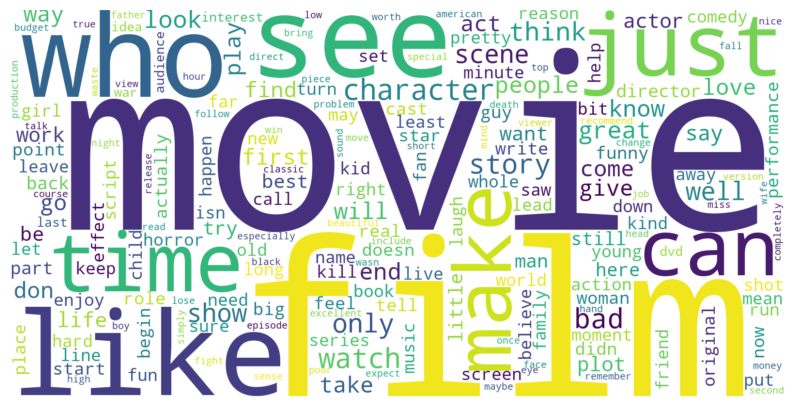

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', width=1600, height=800, max_words=200)
wordcloud.generate_from_frequencies(frequencies=vectorizer.document_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Vectorizer (TF-IDF)

In [33]:
import joblib
from vectorizer_tfidf import reviewTfidfVectorizer

vectorizer = reviewTfidfVectorizer()
vectorizer = joblib.load('vec_models/review_tfidf_vectorizer.pkl')

In [34]:
vocabulary = vectorizer.vocabulary_
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  9593


### Word2Vec (Unigram)

In [42]:
from w2v import movieFeedbackWord2Vec

w2v_skipgram = movieFeedbackWord2Vec()
w2v_skipgram.load("vec_models/skipgram_model.bin")
w2v_skipgram.most_similar("terrible")

[('horrible', 0.83219975233078),
 ('awful', 0.8078225255012512),
 ('bad', 0.7642393112182617),
 ('lousy', 0.7047364711761475),
 ('horrendous', 0.6983423233032227),
 ('horrid', 0.6770736575126648),
 ('atrocious', 0.665478527545929),
 ('abysmal', 0.6625531315803528),
 ('laughable', 0.660169780254364),
 ('poor', 0.6590149998664856)]

In [53]:
vocabulary = w2v_skipgram.get_vocab()
print("Tổng số từ vựng: ", len(vocabulary))

Tổng số từ vựng:  10667


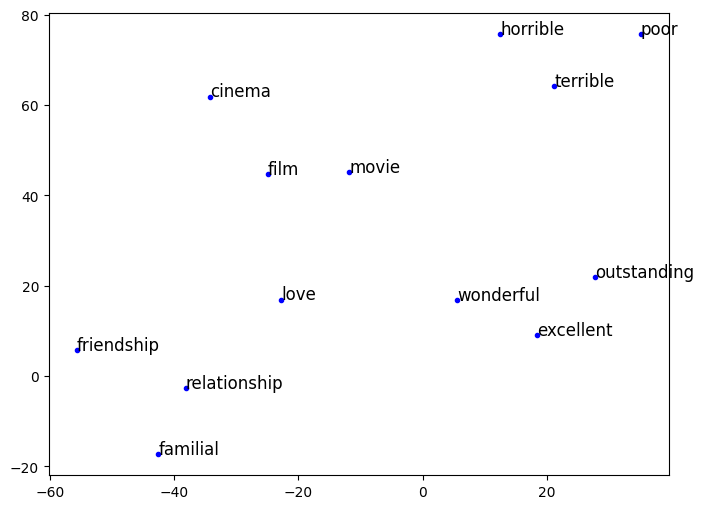

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Chọn các từ bạn muốn vẽ
selected_words = ["film", "movie", "cinema",
                  "friendship", "familial", "love", "relationship",
                  "excellent", "wonderful", "outstanding",
                  "terrible", "horrible", "poor"]

# Lấy vector của các từ từ mô hình
vectors = np.array([w2v_skipgram.get_vector(word) for word in selected_words])

# Giảm chiều dữ liệu về 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=5 ,random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

# Hiển thị tên của các từ
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.show()